# Train sizing
---------------------------------

Download the Australian weather dataset from [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).
 This dataset tries to predict whether or not it will rain tomorrow by
 training a classification model on target `RainTomorrow`.

### Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.metrics import fbeta_score
from atom import ATOMClassifier

# Load the Australian weather dataset
X = pd.read_csv('../weatherAUS.csv')
X = X.drop(['RISK_MM', 'Date'], axis=1)  # Drop unrelated features

In [2]:
# Let's have a look at the dataset
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Run the pipeline

In [5]:
# Initialize ATOM
atom = ATOMClassifier(X, verbose=1, random_state=42)
atom.impute(strat_num='median', strat_cat='most_frequent', min_frac_rows=0.8)
atom.encode()

# We can compare tree-based models via successive halving
atom.train_sizing('lgb',
                  metric='accuracy',
                  max_iter=5,
                  init_points=2,
                  cv=3)

<<=============== ATOM ===============>>
Algorithm task: binary classification.



Running pipeline =================>
Model in pipeline: LGB
Metric: accuracy


<<=============== Iteration 0 ==============>>
Percentage of data: 10.0%
Size of training set: 8890
Size of test set: 3811


Processing: 100%|████████████████████████████████| 1/1 [00:08<00:00,  8.79s/it]




Final results ================>>
Duration: 8.837s
Metric: accuracy
--------------------------------
LightGBM --> 0.845


<<=============== Iteration 1 ==============>>
Percentage of data: 20.0%
Size of training set: 17781
Size of test set: 7621


Processing: 100%|████████████████████████████████| 1/1 [00:09<00:00,  9.97s/it]




Final results ================>>
Duration: 18.863s
Metric: accuracy
--------------------------------
LightGBM --> 0.837


<<=============== Iteration 2 ==============>>
Percentage of data: 30.0%
Size of training set: 26672
Size of test set: 11431


Processing: 100%|████████████████████████████████| 1/1 [00:17<00:00, 17.26s/it]




Final results ================>>
Duration: 36.187s
Metric: accuracy
--------------------------------
LightGBM --> 0.852


<<=============== Iteration 3 ==============>>
Percentage of data: 40.0%
Size of training set: 35562
Size of test set: 15242


Processing: 100%|████████████████████████████████| 1/1 [00:29<00:00, 29.42s/it]




Final results ================>>
Duration: 1m:05s
Metric: accuracy
--------------------------------
LightGBM --> 0.862




<<=============== Iteration 4 ==============>>
Percentage of data: 50.0%
Size of training set: 44454
Size of test set: 19052


Processing: 100%|████████████████████████████████| 1/1 [00:24<00:00, 24.44s/it]




Final results ================>>
Duration: 1m:30s
Metric: accuracy
--------------------------------
LightGBM --> 0.857




<<=============== Iteration 5 ==============>>
Percentage of data: 60.0%
Size of training set: 53344
Size of test set: 22863


Processing: 100%|████████████████████████████████| 1/1 [00:30<00:00, 30.59s/it]




Final results ================>>
Duration: 2m:01s
Metric: accuracy
--------------------------------
LightGBM --> 0.859


Processing:   0%|                                        | 0/1 [00:00<?, ?it/s]



<<=============== Iteration 6 ==============>>
Percentage of data: 70.0%
Size of training set: 62235
Size of test set: 26673


Processing: 100%|████████████████████████████████| 1/1 [00:47<00:00, 47.88s/it]




Final results ================>>
Duration: 2m:50s
Metric: accuracy
--------------------------------
LightGBM --> 0.862


<<=============== Iteration 7 ==============>>
Percentage of data: 80.0%
Size of training set: 71126
Size of test set: 30483


Processing: 100%|████████████████████████████████| 1/1 [00:58<00:00, 58.07s/it]




Final results ================>>
Duration: 3m:48s
Metric: accuracy
--------------------------------
LightGBM --> 0.854




<<=============== Iteration 8 ==============>>
Percentage of data: 90.0%
Size of training set: 80017
Size of test set: 34293


Processing: 100%|████████████████████████████████| 1/1 [00:57<00:00, 57.22s/it]




Final results ================>>
Duration: 4m:46s
Metric: accuracy
--------------------------------
LightGBM --> 0.860




<<=============== Iteration 9 ==============>>
Percentage of data: 100.0%
Size of training set: 88907
Size of test set: 38104


Processing: 100%|████████████████████████████████| 1/1 [01:15<00:00, 75.39s/it]



Final results ================>>
Duration: 6m:02s
Metric: accuracy
--------------------------------
LightGBM --> 0.855


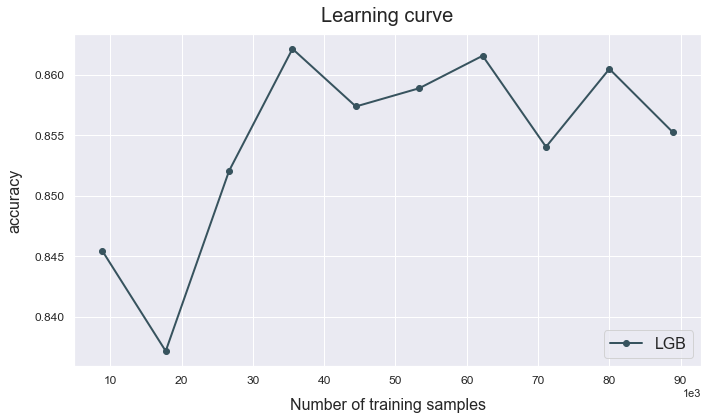

In [6]:
atom.plot_learning_curve()